# Uber Rides Data Analysis

## Overview

This project focuses on analyzing uber ride data to derive insights into ride patterns, purposes, and temporal trends using python. The problem statement involves understanding ride characteristics such as category, purpose, distance, and time distribution. The objectives are to preprocess the data, perform exploratory data analysis, and visualize key metrics to support decision-making for ride optimization.

## Introduction and Library Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
np.random.seed(42)

## Data Loading and Exploration

Error loading data: HTTP Error 403: Forbidden
         START_DATE          END_DATE  CATEGORY        START             STOP  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-nul

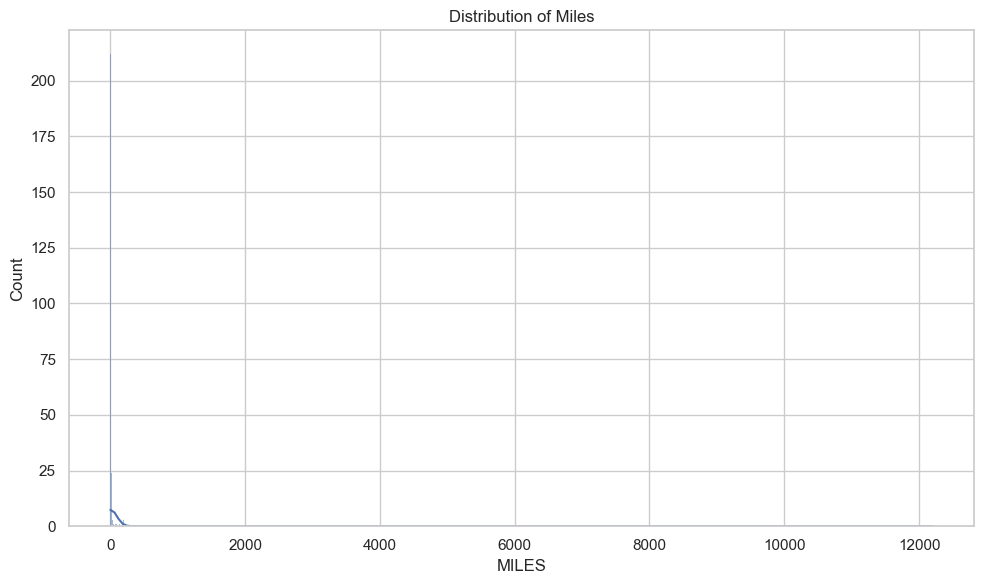

In [3]:
url = "https://media.geeksforgeeks.org/wp-content/uploads/20240723115248/UberDataset.csv"
try:
  dataset = pd.read_csv(url, parse_dates=["START_DATE", "END_DATE"])
except Exception as e:
  print(f"Error loading data: {e}")
  dataset = pd.read_csv("uber-data.csv", parse_dates=["START_DATE", "END_DATE"])

print(dataset.head())

dataset.info()

print(dataset.describe())

print(dataset.isna().sum().sort_values(ascending=False))

fig, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(dataset['MILES'], kde=True, ax=axs)
axs.set_title('Distribution of Miles')
plt.tight_layout()
plt.show()

> **Initial observations:** The dataset has 1156 rows and 7 columns, with null values in `PURPOSE`. `MILES` distribution is right-skewed, suggesting potential outliers or varying ride lengths.

## Data Cleaning and Preprocessing

In [4]:
dataset['PURPOSE'].fillna("NOT", inplace=True)

dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

dataset['day-night'] = pd.cut(x=dataset['time'], bins=[0, 10, 15, 19, 24], labels=['Morning', 'Afternoon', 'Evening', 'Night'])

dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)

print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  413 non-null    datetime64[ns]
 1   END_DATE    413 non-null    datetime64[ns]
 2   CATEGORY    413 non-null    object        
 3   START       413 non-null    object        
 4   STOP        413 non-null    object        
 5   MILES       413 non-null    float64       
 6   PURPOSE     413 non-null    object        
 7   date        413 non-null    object        
 8   time        413 non-null    float64       
 9   day-night   413 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 32.9+ KB
None
                          START_DATE                       END_DATE  \
count                            413                            413   
mean   2016-07-01 16:00:42.711864320  2016-07-01 16:20:05.230024192   
min              201

## Feature Engineering

In [5]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset['MONTH'] = dataset['MONTH'].map(month_label)

dataset['DAY'] = dataset['START_DATE'].dt.weekday
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
dataset['DAY'] = dataset['DAY'].map(day_label)

## Exploratory Data Analysis

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113, 'MONTH': 12, 'DAY': 7}


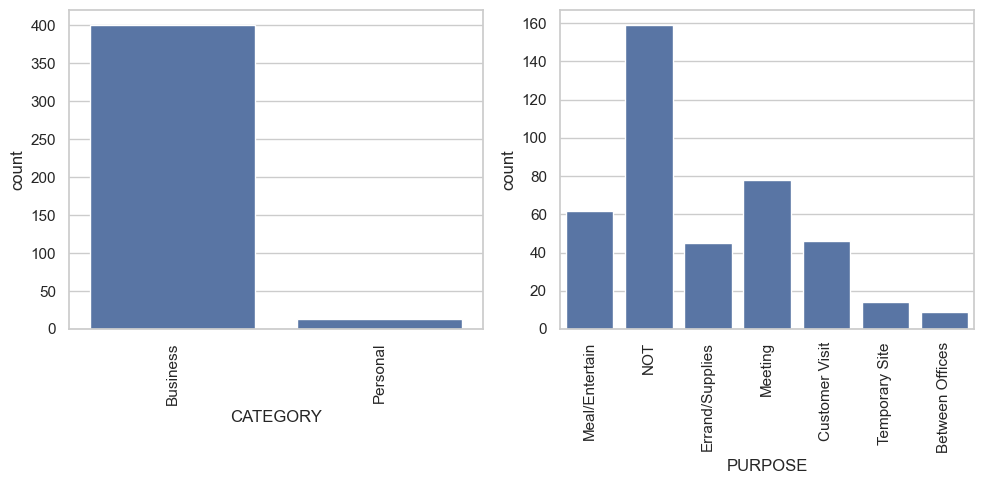

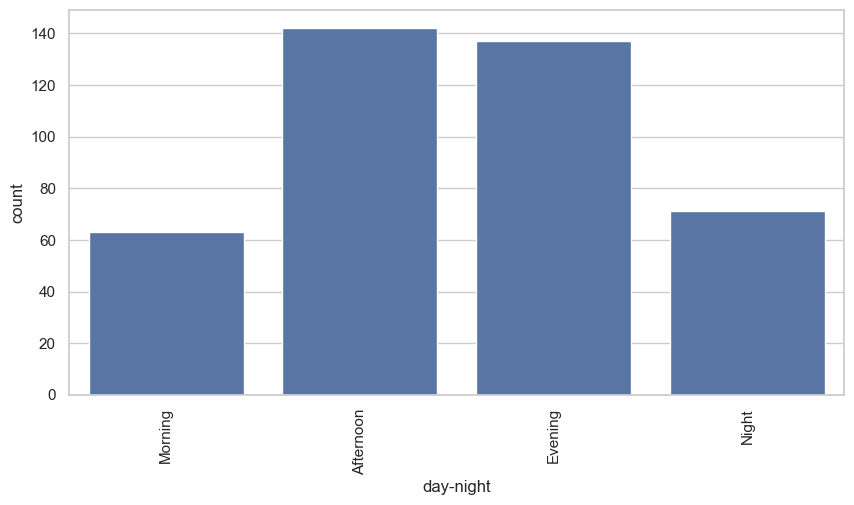

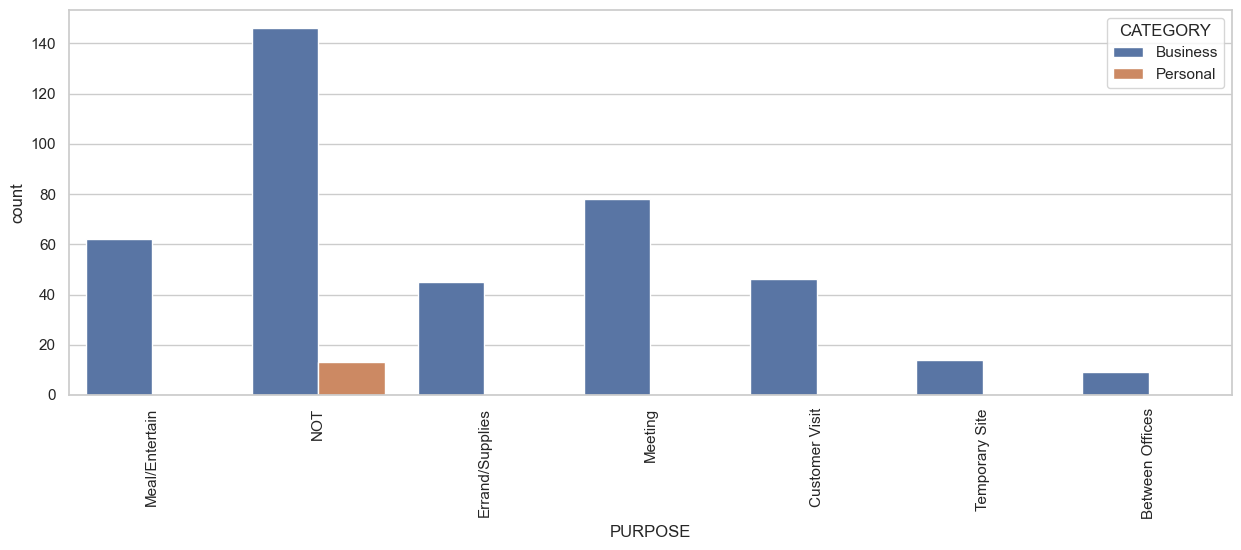

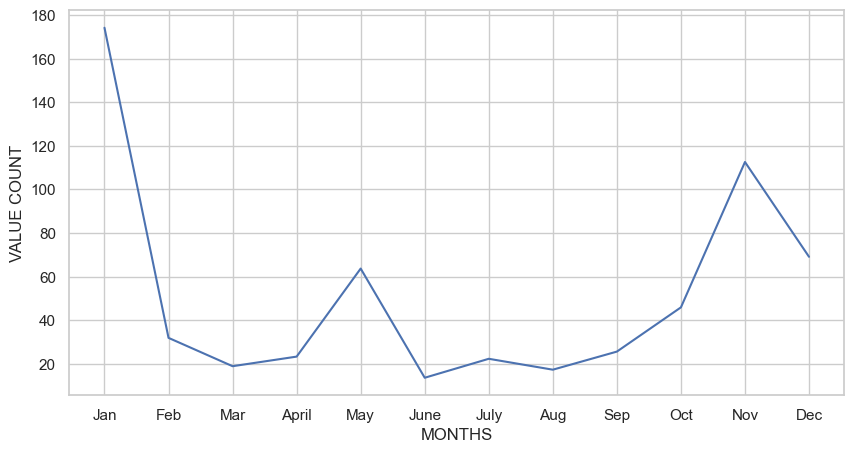

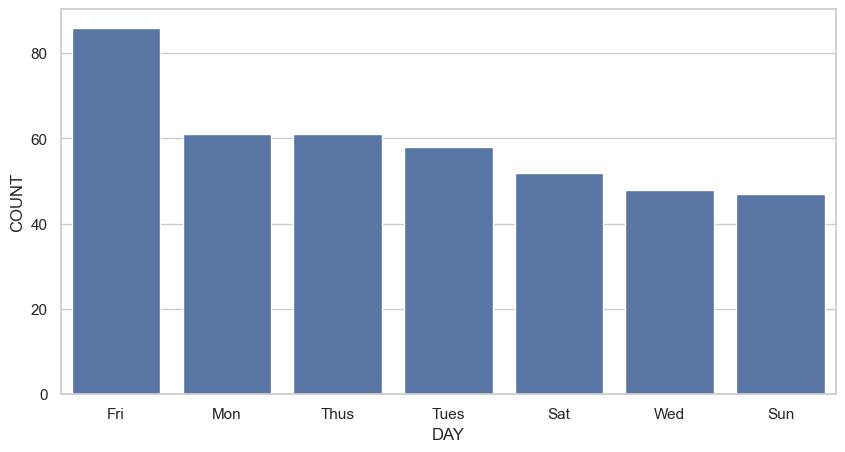

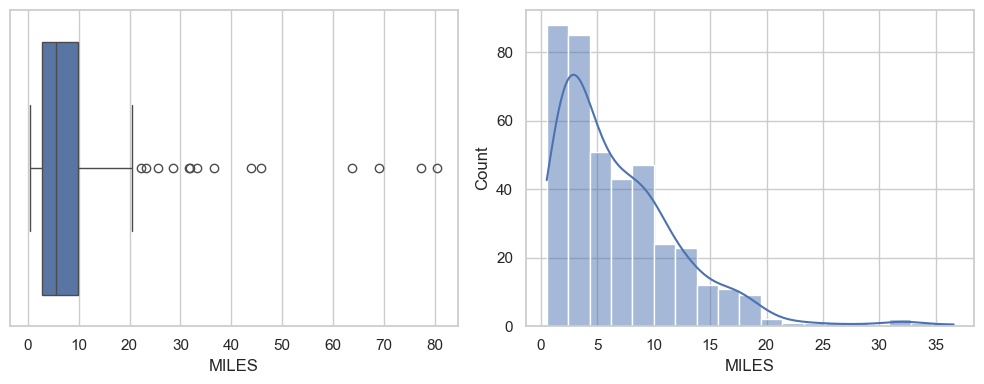

In [8]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
unique_values = {col: dataset[col].unique().size for col in object_cols}
print(unique_values)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x='CATEGORY')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x='PURPOSE')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='day-night')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 5))
mon = dataset['MONTH'].value_counts(sort=False)
df = pd.DataFrame({"MONTHS": mon.index, "VALUE COUNT": dataset.groupby('MONTH')['MILES'].max()})
sns.lineplot(data=df, x='MONTHS', y='VALUE COUNT')
plt.show()

plt.figure(figsize=(10, 5))
day_label = dataset['DAY'].value_counts()
sns.barplot(x=day_label.index, y=day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=dataset[dataset['MILES'] < 100]['MILES'])
plt.subplot(1, 2, 2)
sns.histplot(dataset[dataset['MILES'] < 40]['MILES'], kde=True)
plt.tight_layout()
plt.show()

> **Insights:** Business rides dominate; afternoons are busiest; ride distances cluster below 20 miles, with peaks at 4-5 miles. Winter months (Nov-Jan) show lower activity, likely due to weather.

## Conclusion and Recommendations

| Aspect                | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| Conclusion            | This project successfully analyzed Uber ride data, revealing key patterns in ride distribution and timing. |
| Key Insights          | Business rides dominate in afternoons, with distances peaking at 4-5 miles; seasonal dips occur in winter months. Objectives were met with comprehensive visualizations. |
| Practical Applications| Optimize ride scheduling and fleet allocation.                              |
| Ethical Considerations| Insights should inform, not dictate, operational decisions; ensure data privacy. |